In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap

df = pd.read_csv('preprocessed_crop_production.csv')

X = df.drop(columns=['state_name', 'district_name', 'season', 'crop', 'yield'])
y = df['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [41]:
X

,crop_year,area,production
0,0.166667,1.461475e-04,1.598977e-06
1,0.166667,2.284356e-07,7.994883e-10
2,0.166667,1.188331e-05,2.566358e-07
3,0.166667,2.050792e-05,5.124720e-07
4,0.166667,8.391044e-05,1.319156e-07
...,...,...,...
242563,0.944444,3.565926e-05,6.403902e-07
242564,0.944444,7.307141e-05,3.701631e-07
242565,0.944444,3.775714e-05,1.299169e-05
242566,0.944444,3.253470e-02,4.780133e-04


 97%|=================== | 47027/48514 [00:30<00:00]       

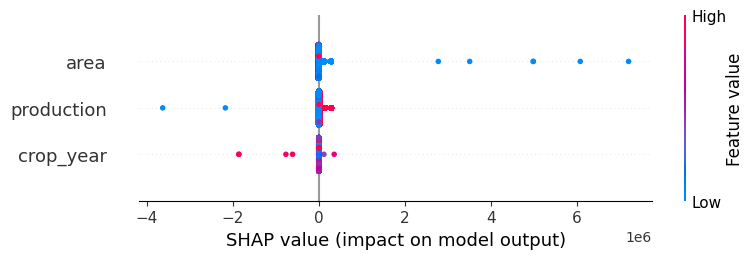

In [24]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)

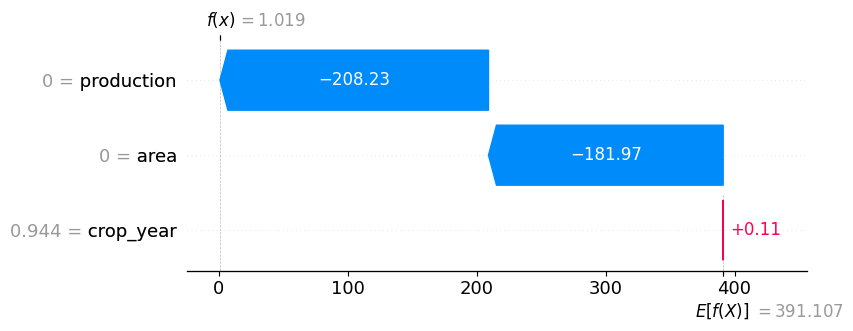

In [26]:
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[0],  
        base_values=explainer.expected_value,  
        data=X_test.iloc[0, :],  
        feature_names=X_test.columns  
    )
)


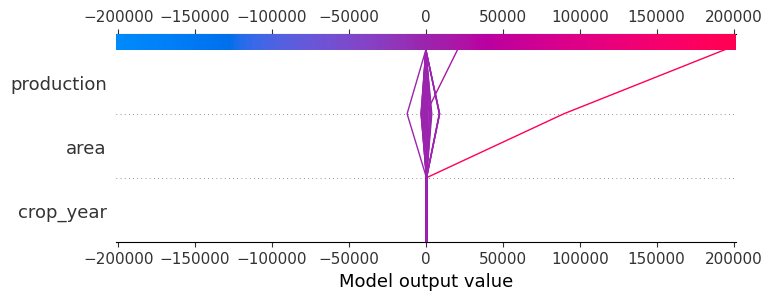

In [33]:
shap.decision_plot(explainer.expected_value, shap_values.values[:100], X_test.iloc[:10])


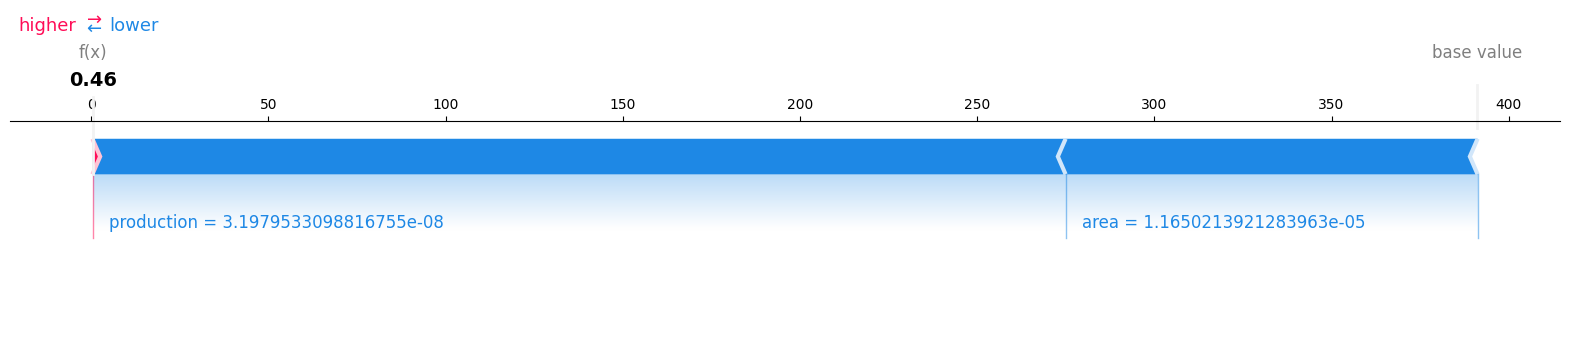

In [38]:
shap.force_plot(
    explainer.expected_value, 
    shap_values.values[2],  
    X_test.iloc[2, :], 
    matplotlib=True
)
